In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import  seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [2]:
# importing the datasets
frogdata= pd.read_excel("all_frog_data.xlsx")
frogdata.head()

,Unnamed: 0,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species
0,0,2574007008,2020-01-23 01:38:00,Australia,Australia,New South Wales,-32.719457,152.159267,Litoria Fallax
1,1,3457021422,2010-03-14 22:23:00,Costa Rica,Central America,Puntarenas,8.496999,-83.318613,Agalychnis Callidryas
2,2,1571195309,2014-04-11 19:51:57,Costa Rica,Central America,Heredia,10.450801,-84.068659,Agalychnis Callidryas
3,3,2265778539,2018-07-21 21:24:21,Costa Rica,Central America,Puntarenas,9.756705,-84.613363,Agalychnis Callidryas
4,4,3407962690,2021-10-29 13:57:00,Australia,Australia,Queensland,-26.714302,152.815096,Litoria Fallax


In [3]:
frogdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193791 entries, 0 to 193790
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        193791 non-null  int64         
 1   gbifID            193791 non-null  int64         
 2   eventDate         185026 non-null  datetime64[ns]
 3   country           193791 non-null  object        
 4   continent         193791 non-null  object        
 5   stateProvince     193790 non-null  object        
 6   decimalLatitude   193791 non-null  float64       
 7   decimalLongitude  193788 non-null  float64       
 8   species           193791 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 13.3+ MB


In [4]:
ML= pd.read_excel("All_MLOut_new.xlsx")
ML.head()

,Unnamed: 0,gbifID,country,continent,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,0,2574007008,Australia,Australia,-32.719457,152.159267,Litoria Fallax,1,0,96.00000,118.71667,23.830004,13.908336
1,1,3457021422,Costa Rica,Central America,8.496999,-83.318613,Agalychnis Callidryas,0,1,231.51666,131.88333,31.841667,21.111668
2,2,1571195309,Costa Rica,Central America,10.450801,-84.068659,Agalychnis Callidryas,0,2,279.20000,51.70000,31.341671,22.455004
3,3,2265778539,Costa Rica,Central America,9.756705,-84.613363,Agalychnis Callidryas,0,3,192.10000,171.81667,31.043331,20.061670
4,4,3407962690,Australia,Australia,-26.714302,152.815096,Litoria Fallax,1,4,84.80000,111.61667,25.933338,13.801668


since both of the data set contain some common columns, we will drop the common columns so it doesnt duplicate before we merge them

In [5]:
#dropping duplicate columns
frogdata= frogdata.drop(['Unnamed: 0','country', 'continent','decimalLatitude', 'decimalLongitude','species' ], axis=1)
frogdata

,gbifID,eventDate,stateProvince
0,2574007008,2020-01-23 01:38:00,New South Wales
1,3457021422,2010-03-14 22:23:00,Puntarenas
2,1571195309,2014-04-11 19:51:57,Heredia
3,2265778539,2018-07-21 21:24:21,Puntarenas
4,3407962690,2021-10-29 13:57:00,Queensland
...,...,...,...
193786,1322002619,NaT,Panamá
193787,1319899134,1937-04-01 00:00:00,Panamá
193788,1318901755,1937-04-05 00:00:00,Panamá
193789,1322299951,2002-07-09 00:00:00,Gracias a Dios


In [6]:
#merging the 2 data sets
Frogdata=frogdata.merge(ML,on='gbifID')
Frogdata

,gbifID,eventDate,stateProvince,Unnamed: 0,country,continent,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,2574007008,2020-01-23 01:38:00,New South Wales,0,Australia,Australia,-32.719457,152.159267,Litoria Fallax,1,0,96.00000,118.71667,23.830004,13.908336
1,3457021422,2010-03-14 22:23:00,Puntarenas,1,Costa Rica,Central America,8.496999,-83.318613,Agalychnis Callidryas,0,1,231.51666,131.88333,31.841667,21.111668
2,1571195309,2014-04-11 19:51:57,Heredia,2,Costa Rica,Central America,10.450801,-84.068659,Agalychnis Callidryas,0,2,279.20000,51.70000,31.341671,22.455004
3,2265778539,2018-07-21 21:24:21,Puntarenas,3,Costa Rica,Central America,9.756705,-84.613363,Agalychnis Callidryas,0,3,192.10000,171.81667,31.043331,20.061670
4,3407962690,2021-10-29 13:57:00,Queensland,4,Australia,Australia,-26.714302,152.815096,Litoria Fallax,1,4,84.80000,111.61667,25.933338,13.801668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193786,1322002619,NaT,Panamá,193786,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,193786,158.16667,214.81667,31.203335,24.071667
193787,1319899134,1937-04-01 00:00:00,Panamá,193787,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,193787,158.16667,214.81667,31.203335,24.071667
193788,1318901755,1937-04-05 00:00:00,Panamá,193788,Panama,Central America,8.791700,-79.561100,Dendrobates Auratus,0,193788,158.16667,214.81667,31.203335,24.071667
193789,1322299951,2002-07-09 00:00:00,Gracias a Dios,193789,Honduras,Central America,15.091100,-83.557800,Agalychnis Callidryas,0,193789,190.06667,141.43333,29.326668,23.588335


In [7]:
#get column info
Frogdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193791 entries, 0 to 193790
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   gbifID            193791 non-null  int64         
 1   eventDate         185026 non-null  datetime64[ns]
 2   stateProvince     193790 non-null  object        
 3   Unnamed: 0        193791 non-null  int64         
 4   country           193791 non-null  object        
 5   continent         193791 non-null  object        
 6   decimalLatitude   193791 non-null  float64       
 7   decimalLongitude  193791 non-null  float64       
 8   species           193791 non-null  object        
 9   occurrenceStatus  193791 non-null  int64         
 10  key               193791 non-null  int64         
 11  ppt_mean          161812 non-null  float64       
 12  soil_mean         161812 non-null  float64       
 13  tmax_mean         161812 non-null  float64       
 14  tmin

Some of the columns contains null values so we will find the total null values and move from there.

In [8]:
#TOTAL null values
Frogdata.isnull().sum()

gbifID                  0
eventDate            8765
stateProvince           1
Unnamed: 0              0
country                 0
continent               0
decimalLatitude         0
decimalLongitude        0
species                 0
occurrenceStatus        0
key                     0
ppt_mean            31979
soil_mean           31979
tmax_mean           31979
tmin_mean           31979
dtype: int64

In [9]:
Frogdata.columns

Index(['gbifID', 'eventDate', 'stateProvince', 'Unnamed: 0', 'country',
       'continent', 'decimalLatitude', 'decimalLongitude', 'species',
       'occurrenceStatus', 'key', 'ppt_mean', 'soil_mean', 'tmax_mean',
       'tmin_mean'],
      dtype='object')

So now that we know the columns with null values, we will replace them with either the mean or median depending on their distribution

In [10]:
#finding and replacing the median of ppt_mean and soil_mean
median= Frogdata.groupby(["species", "country"])[["ppt_mean", "soil_mean"]].transform("median")


In [11]:
Frogdata[["ppt_mean", "soil_mean"]] = Frogdata[["ppt_mean", "soil_mean"]].fillna(median)

In [12]:
#finding and replacing the mean of tmax_mean and tmin_mean
mean= Frogdata.groupby(["species", "country"])[["tmax_mean", "tmin_mean"]].transform("mean")

In [13]:
Frogdata[["tmax_mean", "tmin_mean"]] = Frogdata[["tmax_mean", "tmin_mean"]].fillna(mean)

In [14]:
Frogdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193791 entries, 0 to 193790
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   gbifID            193791 non-null  int64         
 1   eventDate         185026 non-null  datetime64[ns]
 2   stateProvince     193790 non-null  object        
 3   Unnamed: 0        193791 non-null  int64         
 4   country           193791 non-null  object        
 5   continent         193791 non-null  object        
 6   decimalLatitude   193791 non-null  float64       
 7   decimalLongitude  193791 non-null  float64       
 8   species           193791 non-null  object        
 9   occurrenceStatus  193791 non-null  int64         
 10  key               193791 non-null  int64         
 11  ppt_mean          193791 non-null  float64       
 12  soil_mean         193791 non-null  float64       
 13  tmax_mean         193791 non-null  float64       
 14  tmin

Now that we have replace some of the null values with the mean and median, we will drop the missing values in the state province column.

In [15]:
#dropping missing values
Frogdata= Frogdata.dropna(subset=["stateProvince"])
Frogdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193790 entries, 0 to 193790
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   gbifID            193790 non-null  int64         
 1   eventDate         185025 non-null  datetime64[ns]
 2   stateProvince     193790 non-null  object        
 3   Unnamed: 0        193790 non-null  int64         
 4   country           193790 non-null  object        
 5   continent         193790 non-null  object        
 6   decimalLatitude   193790 non-null  float64       
 7   decimalLongitude  193790 non-null  float64       
 8   species           193790 non-null  object        
 9   occurrenceStatus  193790 non-null  int64         
 10  key               193790 non-null  int64         
 11  ppt_mean          193790 non-null  float64       
 12  soil_mean         193790 non-null  float64       
 13  tmax_mean         193790 non-null  float64       
 14  tmin

We will now drop the key and unnamed column since they don't affect the  data


In [16]:
#dropping unnamed and key, and occurrence status columns
Frogdata=Frogdata.drop(['Unnamed: 0','key', 'occurrenceStatus' ], axis=1)
Frogdata

,gbifID,eventDate,stateProvince,country,continent,decimalLatitude,decimalLongitude,species,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,2574007008,2020-01-23 01:38:00,New South Wales,Australia,Australia,-32.719457,152.159267,Litoria Fallax,96.00000,118.71667,23.830004,13.908336
1,3457021422,2010-03-14 22:23:00,Puntarenas,Costa Rica,Central America,8.496999,-83.318613,Agalychnis Callidryas,231.51666,131.88333,31.841667,21.111668
2,1571195309,2014-04-11 19:51:57,Heredia,Costa Rica,Central America,10.450801,-84.068659,Agalychnis Callidryas,279.20000,51.70000,31.341671,22.455004
3,2265778539,2018-07-21 21:24:21,Puntarenas,Costa Rica,Central America,9.756705,-84.613363,Agalychnis Callidryas,192.10000,171.81667,31.043331,20.061670
4,3407962690,2021-10-29 13:57:00,Queensland,Australia,Australia,-26.714302,152.815096,Litoria Fallax,84.80000,111.61667,25.933338,13.801668
...,...,...,...,...,...,...,...,...,...,...,...,...
193786,1322002619,NaT,Panamá,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,158.16667,214.81667,31.203335,24.071667
193787,1319899134,1937-04-01 00:00:00,Panamá,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,158.16667,214.81667,31.203335,24.071667
193788,1318901755,1937-04-05 00:00:00,Panamá,Panama,Central America,8.791700,-79.561100,Dendrobates Auratus,158.16667,214.81667,31.203335,24.071667
193789,1322299951,2002-07-09 00:00:00,Gracias a Dios,Honduras,Central America,15.091100,-83.557800,Agalychnis Callidryas,190.06667,141.43333,29.326668,23.588335


In [17]:
#checking if columns have been dropped
Frogdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193790 entries, 0 to 193790
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   gbifID            193790 non-null  int64         
 1   eventDate         185025 non-null  datetime64[ns]
 2   stateProvince     193790 non-null  object        
 3   country           193790 non-null  object        
 4   continent         193790 non-null  object        
 5   decimalLatitude   193790 non-null  float64       
 6   decimalLongitude  193790 non-null  float64       
 7   species           193790 non-null  object        
 8   ppt_mean          193790 non-null  float64       
 9   soil_mean         193790 non-null  float64       
 10  tmax_mean         193790 non-null  float64       
 11  tmin_mean         193790 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 19.2+ MB


# UNIVARIATE ANALYSIS

# Event Date

In [18]:
Frogdata["eventDate"].value_counts()

2010-12-17 00:00:00    1712
2010-11-01 00:00:00     894
2010-12-18 00:00:00     800
2010-12-01 00:00:00     756
2010-11-05 00:00:00     669
                       ... 
2021-04-09 20:36:52       1
2017-01-13 11:25:00       1
2020-01-17 10:46:30       1
2018-02-11 03:31:00       1
1924-03-28 00:00:00       1
Name: eventDate, Length: 18147, dtype: int64

# country

In [19]:
Frogdata["continent"].value_counts()

Australia             188020
Central America         3930
Africa                  1737
unknown or invalid       103
Name: continent, dtype: int64

since the country contains some invalid or unknown countries, we will replace the columns with the right countries

In [20]:
#replacing unknown countries with Namibia
Frogdata=Frogdata.replace({'country':{'unknown or invalid':'Namibia'}})

In [21]:
#checking if they have been replaced
Frogdata["country"].value_counts()

Australia       188020
Costa Rica        2257
South Africa      1348
Panama             755
Mexico             455
Honduras           144
Colombia           135
Nicaragua          133
Zimbabwe           110
Mozambique         107
Namibia            103
Eswatini            62
Botswana            41
Zambia              32
Guatemala           30
Belize              21
Malawi              18
Lesotho             17
Angola               2
Name: country, dtype: int64

Australia was the highest country recorded.

# Continent

In [22]:
Frogdata["continent"].value_counts()

Australia             188020
Central America         3930
Africa                  1737
unknown or invalid       103
Name: continent, dtype: int64

We will also repalce the unknown continents with the right continent

In [23]:
#replacing the unknown continents with Africa
Frogdata=Frogdata.replace({'continent':{'unknown or invalid':'Africa'}})

In [24]:
#checking if replacement has been done
Frogdata["continent"].value_counts()

Australia          188020
Central America      3930
Africa               1840
Name: continent, dtype: int64

Replacement has been done and we can see Australia had the highest records

# State Province

In [25]:
Frogdata["stateProvince"].value_counts()

New South Wales      99480
Victoria             37093
South Australia      16786
Queensland           13397
Western Australia    10242
                     ...  
México                   1
Thaba- Tseka             1
Zambezi                  1
Thaba-Tseka              1
Qacha's Nek              1
Name: stateProvince, Length: 145, dtype: int64


NSW was the highest state province recorded

# Decimal Latitude

In [26]:
Frogdata.decimalLatitude.describe()

count    193790.000000
mean        -32.582185
std           7.800672
min         -43.766700
25%         -36.000000
50%         -33.835933
75%         -32.289656
max          21.349444
Name: decimalLatitude, dtype: float64

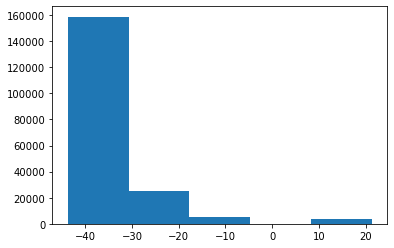

In [27]:
plt.hist(Frogdata["decimalLatitude"], bins = 5)
plt.show()

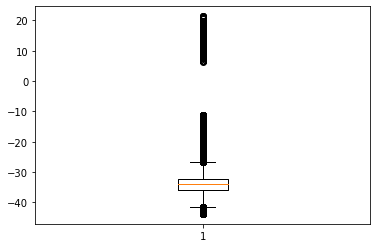

In [28]:
#boxplot to better explain the histogram
plt.boxplot(Frogdata['decimalLatitude'])
plt.show()



# decimal longitude

In [29]:
Frogdata.decimalLongitude.describe()

count    193790.000000
mean        140.656300
std          35.357720
min         -99.221738
25%         144.589642
50%         149.974293
75%         151.194750
max         153.636442
Name: decimalLongitude, dtype: float64

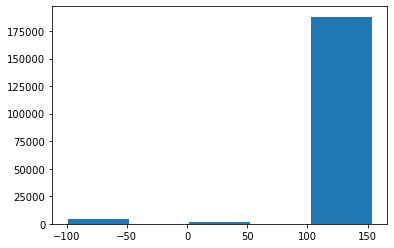

In [30]:
plt.hist(Frogdata["decimalLongitude"], bins = 5)
plt.show()

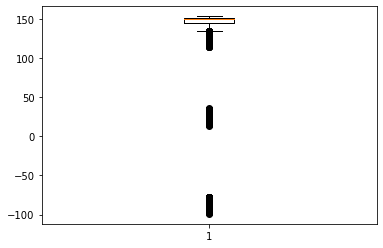

In [31]:
 plt.boxplot(Frogdata['decimalLongitude'])
plt.show()

# Species

In [32]:
Frogdata["species"].value_counts()

Crinia Signifera             126657
Litoria Fallax                47332
Crinia Glauerti                9393
Ranoidea Australis             4097
Agalychnis Callidryas          2212
Dendrobates Auratus            1717
Xenopus Laevis                 1139
Chiromantis Xerampelina         702
Austrochaperina Pluvialis       541
Name: species, dtype: int64

# ppt_mean

In [33]:
Frogdata.ppt_mean.describe()

count    193790.000000
mean         67.954459
std          30.378853
min           0.766667
25%          51.116665
50%          64.600000
75%          72.133330
max         368.750000
Name: ppt_mean, dtype: float64

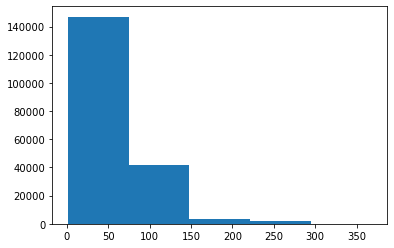

In [34]:
plt.hist(Frogdata["ppt_mean"], bins = 5)
plt.show()

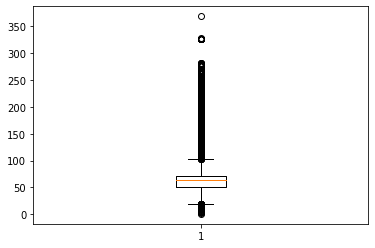

In [35]:
 plt.boxplot(Frogdata['ppt_mean'])
plt.show()

max of the precipitation mean is 368.8ml which is quite high. the precipitation of the data is high

# soil_mean

In [36]:
Frogdata.soil_mean.describe()

count    193790.000000
mean         53.598059
std          46.716954
min           0.000000
25%          26.000000
50%          46.250000
75%          63.883335
max         403.716670
Name: soil_mean, dtype: float64

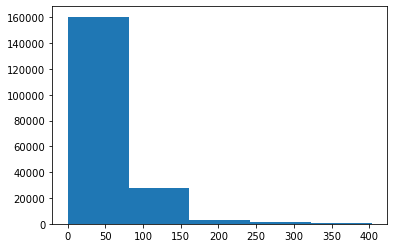

In [37]:
plt.hist(Frogdata["soil_mean"], bins = 5)
plt.show()

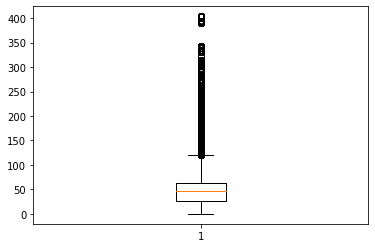

In [38]:
plt.boxplot(Frogdata['soil_mean'])
plt.show()

# tmax_mean

In [39]:
Frogdata.tmax_mean.describe()

count    193790.000000
mean         22.699185
std           3.295337
min          10.465001
25%          20.701666
50%          22.295000
75%          24.438335
max          37.401672
Name: tmax_mean, dtype: float64

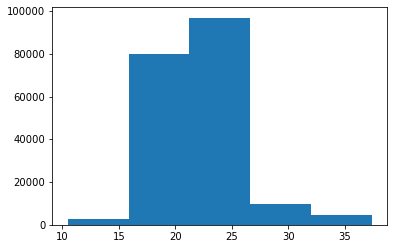

In [40]:
plt.hist(Frogdata["tmax_mean"], bins = 5)
plt.show()

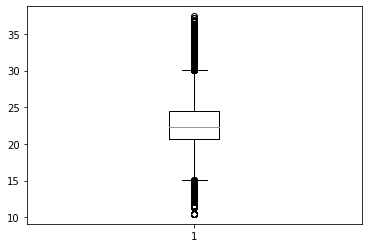

In [41]:
plt.boxplot(Frogdata['tmax_mean'])
plt.show()

# tmin_mean

In [42]:
Frogdata.tmin_mean.describe()

count    193790.000000
mean         11.167678
std           3.292430
min           0.758334
25%           9.066668
50%          10.867501
75%          12.738334
max          25.253334
Name: tmin_mean, dtype: float64

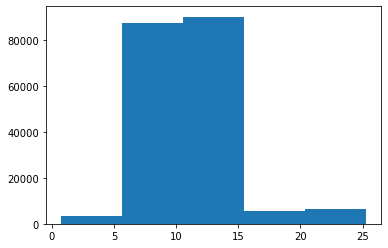

In [43]:
plt.hist(Frogdata["tmin_mean"], bins = 5)
plt.show()

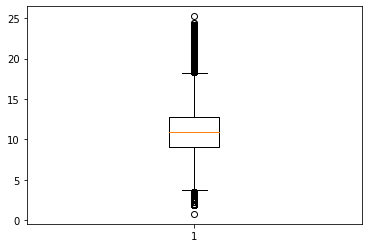

In [44]:
plt.boxplot(Frogdata['tmin_mean'])
plt.show()

# MULTIVARIATE

# checking the continent with their various species recorded

In [45]:
Australia_data = Frogdata[Frogdata['continent'] == 'Australia']
Africa_data = Frogdata[Frogdata['continent'] == 'Africa']
CentralAmerica_data = Frogdata[Frogdata['continent'] == 'Central America']


Text(0.5, 1.0, 'Australia')

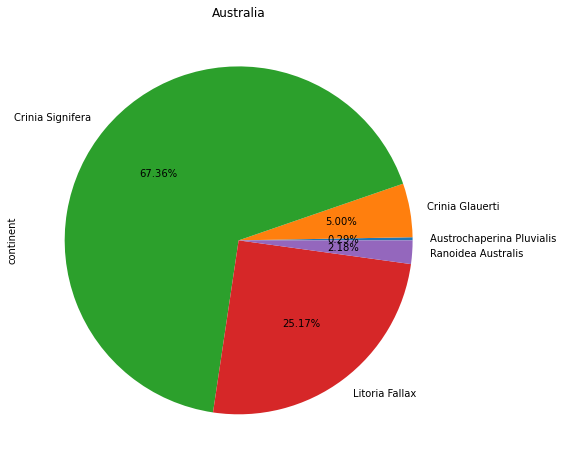

In [46]:
#checking Australia
Australia_data.groupby('species')['continent'].count().plot(kind = 'pie', autopct = '%1.2f%%', figsize = (8,8), fontsize = 10)
plt.title('Australia')

In Australia, the Crinia Signifera was the highest Species recorded and the Austrochaperina Pluvialis was the least species recorded

Text(0.5, 1.0, 'Africa')

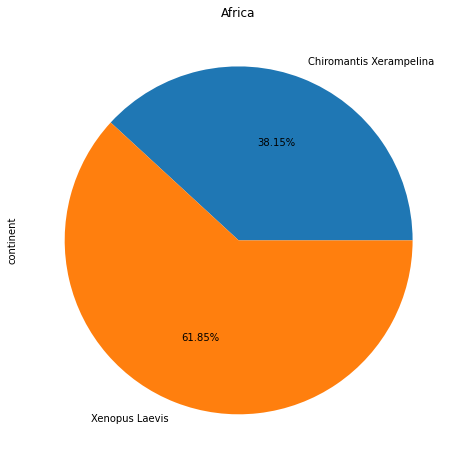

In [47]:
#checking Africa
Africa_data.groupby('species')['continent'].count().plot(kind = 'pie', autopct = '%1.2f%%', figsize = (8,8), fontsize = 10)
plt.title('Africa')

In Africa, the Chiromantis Xerampelina was the highest species recoreded and the xenopus laevis was the least recorded. Only two species were recorded in Africa

Text(0.5, 1.0, 'Central America')

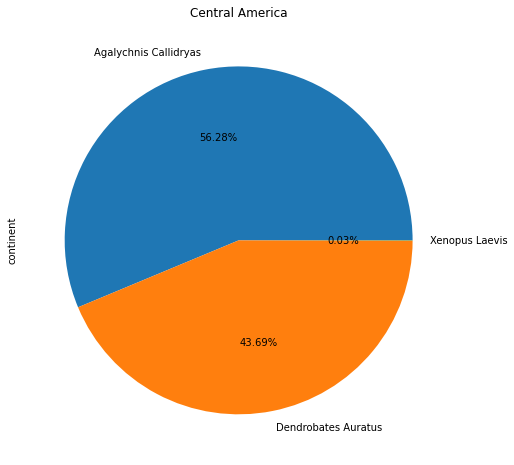

In [48]:
#checking for Central America
CentralAmerica_data.groupby('species')['continent'].count().plot(kind = 'pie', autopct = '%1.2f%%', figsize = (8,8), fontsize = 10)
plt.title('Central America')

In Central America, the Agalychnis Callidryas was the highest species recorded and the Xenopus Laevis was the least recorded

In [49]:
#checking the continent with the min. temperature
Frogdata.groupby(['continent', 'species'])['tmin_mean',].max()

tmin_mean
continent       species                             
Africa          Chiromantis Xerampelina    20.705004
                Xenopus Laevis             19.120000
Australia       Austrochaperina Pluvialis  20.905000
                Crinia Glauerti            18.586668
                Crinia Signifera           21.785002
                Litoria Fallax             21.785002
                Ranoidea Australis         25.253334
Central America Agalychnis Callidryas      24.465000
                Dendrobates Auratus        24.465000
                Xenopus Laevis              6.651668

Africa was the continent with the minimum temperature experienced

# Checking the Correlation between some columns

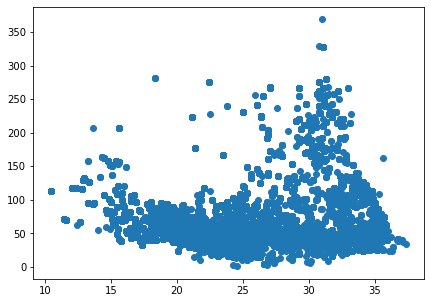

In [74]:
#correlation between the Tmax_mean and the ppt_mean
plt.scatter(Frogdata['tmax_mean'],Frogdata['ppt_mean'])
plt.show()

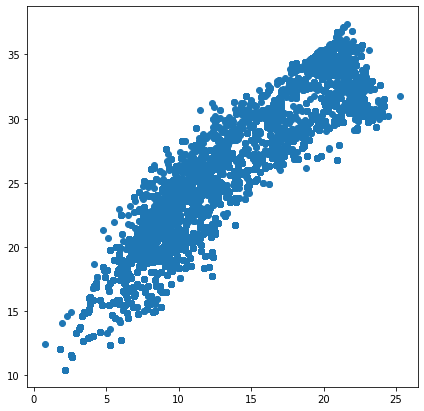

In [76]:
#correlation between the Tmax_mean and the tmin_mean
plt.scatter(Frogdata['tmin_mean'],Frogdata ['tmax_mean'])
plt.show()

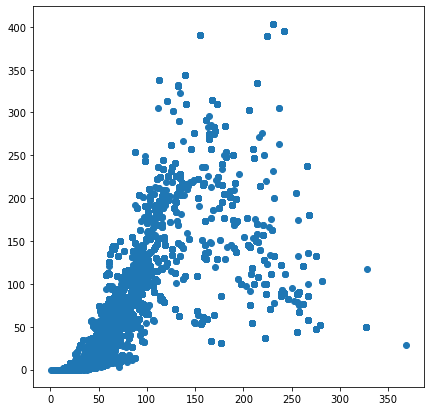

In [77]:
plt.scatter(Frogdata['ppt_mean'],Frogdata['soil_mean'])
plt.show()

# MACHINE LEARNING

# For this machine learning we will be predicting the species of frogs with the information given.

We will begin by dropping the columns with null values

In [53]:
Frogdata.head()

,gbifID,eventDate,stateProvince,country,continent,decimalLatitude,decimalLongitude,species,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,2574007008,2020-01-23 01:38:00,New South Wales,Australia,Australia,-32.719457,152.159267,Litoria Fallax,96.00000,118.71667,23.830004,13.908336
1,3457021422,2010-03-14 22:23:00,Puntarenas,Costa Rica,Central America,8.496999,-83.318613,Agalychnis Callidryas,231.51666,131.88333,31.841667,21.111668
2,1571195309,2014-04-11 19:51:57,Heredia,Costa Rica,Central America,10.450801,-84.068659,Agalychnis Callidryas,279.20000,51.70000,31.341671,22.455004
3,2265778539,2018-07-21 21:24:21,Puntarenas,Costa Rica,Central America,9.756705,-84.613363,Agalychnis Callidryas,192.10000,171.81667,31.043331,20.061670
4,3407962690,2021-10-29 13:57:00,Queensland,Australia,Australia,-26.714302,152.815096,Litoria Fallax,84.80000,111.61667,25.933338,13.801668


In [54]:
#checking for null values
Frogdata.isnull().sum()

gbifID                 0
eventDate           8765
stateProvince          0
country                0
continent              0
decimalLatitude        0
decimalLongitude       0
species                0
ppt_mean               0
soil_mean              0
tmax_mean              0
tmin_mean              0
dtype: int64

We will now encode the Continent column which are categorical values into numerical values for our machine learning


In [55]:
#encoding the continent column into numerical values
Continent=pd.get_dummies(Frogdata['continent'], drop_first=True)
Continent

,Australia,Central America
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
193786,0,1
193787,0,1
193788,0,1
193789,0,1


We will add  all the columns together now using the concat function

In [56]:
#concating
Frogdata1=pd.concat([Frogdata,Continent], axis=1)
Frogdata1

,gbifID,eventDate,stateProvince,country,continent,decimalLatitude,decimalLongitude,species,ppt_mean,soil_mean,tmax_mean,tmin_mean,Australia,Central America
0,2574007008,2020-01-23 01:38:00,New South Wales,Australia,Australia,-32.719457,152.159267,Litoria Fallax,96.00000,118.71667,23.830004,13.908336,1,0
1,3457021422,2010-03-14 22:23:00,Puntarenas,Costa Rica,Central America,8.496999,-83.318613,Agalychnis Callidryas,231.51666,131.88333,31.841667,21.111668,0,1
2,1571195309,2014-04-11 19:51:57,Heredia,Costa Rica,Central America,10.450801,-84.068659,Agalychnis Callidryas,279.20000,51.70000,31.341671,22.455004,0,1
3,2265778539,2018-07-21 21:24:21,Puntarenas,Costa Rica,Central America,9.756705,-84.613363,Agalychnis Callidryas,192.10000,171.81667,31.043331,20.061670,0,1
4,3407962690,2021-10-29 13:57:00,Queensland,Australia,Australia,-26.714302,152.815096,Litoria Fallax,84.80000,111.61667,25.933338,13.801668,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193786,1322002619,NaT,Panamá,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,158.16667,214.81667,31.203335,24.071667,0,1
193787,1319899134,1937-04-01 00:00:00,Panamá,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,158.16667,214.81667,31.203335,24.071667,0,1
193788,1318901755,1937-04-05 00:00:00,Panamá,Panama,Central America,8.791700,-79.561100,Dendrobates Auratus,158.16667,214.81667,31.203335,24.071667,0,1
193789,1322299951,2002-07-09 00:00:00,Gracias a Dios,Honduras,Central America,15.091100,-83.557800,Agalychnis Callidryas,190.06667,141.43333,29.326668,23.588335,0,1


We will drop some columns since they are irrelevant to the machine learning

In [57]:
#dropping some columns
Frogdata1.drop(["gbifID","stateProvince","country", "continent"], axis=1)

,eventDate,decimalLatitude,decimalLongitude,species,ppt_mean,soil_mean,tmax_mean,tmin_mean,Australia,Central America
0,2020-01-23 01:38:00,-32.719457,152.159267,Litoria Fallax,96.00000,118.71667,23.830004,13.908336,1,0
1,2010-03-14 22:23:00,8.496999,-83.318613,Agalychnis Callidryas,231.51666,131.88333,31.841667,21.111668,0,1
2,2014-04-11 19:51:57,10.450801,-84.068659,Agalychnis Callidryas,279.20000,51.70000,31.341671,22.455004,0,1
3,2018-07-21 21:24:21,9.756705,-84.613363,Agalychnis Callidryas,192.10000,171.81667,31.043331,20.061670,0,1
4,2021-10-29 13:57:00,-26.714302,152.815096,Litoria Fallax,84.80000,111.61667,25.933338,13.801668,1,0
...,...,...,...,...,...,...,...,...,...,...
193786,NaT,8.806900,-79.515300,Dendrobates Auratus,158.16667,214.81667,31.203335,24.071667,0,1
193787,1937-04-01 00:00:00,8.806900,-79.515300,Dendrobates Auratus,158.16667,214.81667,31.203335,24.071667,0,1
193788,1937-04-05 00:00:00,8.791700,-79.561100,Dendrobates Auratus,158.16667,214.81667,31.203335,24.071667,0,1
193789,2002-07-09 00:00:00,15.091100,-83.557800,Agalychnis Callidryas,190.06667,141.43333,29.326668,23.588335,0,1


In [58]:
cols = ['ppt_mean', 'soil_mean', 'tmax_mean', 'tmin_mean', 'decimalLatitude',
       'decimalLongitude', 'Australia', 'Central America','species']

Frogdata1 = Frogdata1[cols]

In [59]:
Frogdata1.head()

,ppt_mean,soil_mean,tmax_mean,tmin_mean,decimalLatitude,decimalLongitude,Australia,Central America,species
0,96.00000,118.71667,23.830004,13.908336,-32.719457,152.159267,1,0,Litoria Fallax
1,231.51666,131.88333,31.841667,21.111668,8.496999,-83.318613,0,1,Agalychnis Callidryas
2,279.20000,51.70000,31.341671,22.455004,10.450801,-84.068659,0,1,Agalychnis Callidryas
3,192.10000,171.81667,31.043331,20.061670,9.756705,-84.613363,0,1,Agalychnis Callidryas
4,84.80000,111.61667,25.933338,13.801668,-26.714302,152.815096,1,0,Litoria Fallax


We will now train and Test the data

In [60]:
#Train Data
X,y = Frogdata1.iloc[:,:-1], Frogdata1.iloc[:,-1]

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3)

print('X:train {0} | X_test {1}'.format (X_train.shape, X_test.shape))

X:train (135653, 8) | X_test (58137, 8)


In [61]:
Forestmodel = RandomForestClassifier()
Forestmodel.fit(X_train, y_train)

RandomForestClassifier()

# PREDICTION

In [62]:
predictions=Forestmodel.predict(X_test)

In [63]:
from sklearn.metrics import classification_report

In [64]:
classification_report(y_test, predictions)

'                           precision    recall  f1-score   support\n\n    Agalychnis Callidryas       0.89      0.91      0.90       668\nAustrochaperina Pluvialis       0.89      0.92      0.90       154\n  Chiromantis Xerampelina       0.93      0.90      0.92       185\n          Crinia Glauerti       1.00      1.00      1.00      2905\n         Crinia Signifera       0.95      0.94      0.95     37941\n      Dendrobates Auratus       0.88      0.86      0.87       542\n           Litoria Fallax       0.85      0.86      0.86     14153\n       Ranoidea Australis       1.00      1.00      1.00      1244\n           Xenopus Laevis       0.95      0.96      0.95       345\n\n                 accuracy                           0.93     58137\n                macro avg       0.93      0.93      0.93     58137\n             weighted avg       0.93      0.93      0.93     58137\n'

In [65]:
 from sklearn.metrics import confusion_matrix

In [66]:
#checking the actual predictions against the estimated predictions
confusion_matrix(y_test, predictions)

array([[  606,     0,     0,     0,     0,    61,     0,     0,     1],
       [    0,   142,     0,     0,     0,     0,    12,     0,     0],
       [    0,     0,   167,     0,     0,     0,     0,     0,    18],
       [    0,     0,     0,  2904,     1,     0,     0,     0,     0],
       [    0,     0,     0,     0, 35839,     0,  2102,     0,     0],
       [   74,     0,     0,     0,     0,   468,     0,     0,     0],
       [    0,    18,     0,     2,  1932,     0, 12198,     3,     0],
       [    0,     0,     0,     0,     0,     0,     5,  1239,     0],
       [    0,     0,    13,     0,     0,     0,     0,     0,   332]],
      dtype=int64)

In [67]:
#checking the accuracy
from sklearn.metrics import accuracy_score


In [68]:
print(" %.3f " % accuracy_score(y_test, predictions))

 0.927 


In [69]:
predictions

array(['Dendrobates Auratus', 'Crinia Glauerti', 'Litoria Fallax', ...,
       'Crinia Signifera', 'Litoria Fallax', 'Crinia Signifera'],
      dtype=object)

In [70]:
#plotting the confusion matrix
from sklearn.metrics import plot_confusion_matrix

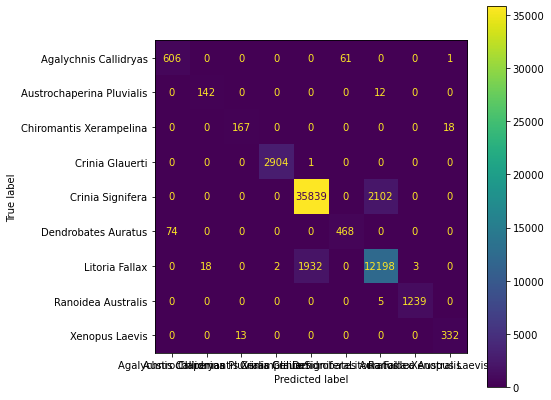

In [75]:
plt.rcParams['figure.figsize'] = (7,7)
plot_confusion_matrix(Forestmodel, X_test, y_test)

# ##The model has a 93% accuracy which is good 